In [ ]:
from google.colab import drive
drive.mount("/content/drive")
#colab bağlantısı yapıldı

Mounted at /content/drive


In [ ]:
#pip install imutils
#veri okuma ve işlemede kullanılacak kütüphaneler
import cv2
import urllib
import numpy as np
import pandas as pd
import seaborn as sns
import random, os, glob
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from urllib.request import urlopen

#uyarıları kapatmak için kullanılan
import warnings
warnings.filterwarnings("ignore")

#model değerlendirmede kullanılanlar
from sklearn.metrics import confusion_matrix, classification_report

#model için kullanılacak kütüphaneler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import random # for visualization
from sklearn.preprocessing import LabelEncoder
print('Libraries Imported')

Libraries Imported


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/BilgProje/mias/all-mias/'

In [ ]:
print("reading dataframe")
info=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BilgProje/mias/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [ ]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [ ]:
info.dropna(subset = ["SEVERITY"], inplace=True)

info.reset_index(inplace = True)
info

,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,5,mdb005,F,CIRC,B,500.0,168.0,26.0
4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...,...,...
118,281,mdb274,F,MISC,M,127.0,505.0,123.0
119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
120,319,mdb312,F,MISC,B,240.0,263.0,20.0
121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [ ]:
info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info = info.drop('level_0', axis =1)
info = info.drop('index', axis =1)
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb005,F,CIRC,B,477.0,133.0,30.0
3,mdb010,F,CIRC,B,525.0,425.0,33.0
4,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...
117,mdb274,F,MISC,M,127.0,505.0,123.0
118,mdb290,D,CIRC,B,337.0,353.0,45.0
119,mdb312,F,MISC,B,240.0,263.0,20.0
120,mdb314,F,MISC,B,518.0,191.0,39.0


In [ ]:
# B = 0
# M = 1
lb = LabelEncoder()
info['SEVERITY'] = lb.fit_transform(info['SEVERITY'])
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,0,535.0,425.0,197.0
1,mdb002,G,CIRC,0,522.0,280.0,69.0
2,mdb005,F,CIRC,0,477.0,133.0,30.0
3,mdb010,F,CIRC,0,525.0,425.0,33.0
4,mdb012,F,CIRC,0,471.0,458.0,40.0
...,...,...,...,...,...,...,...
117,mdb274,F,MISC,1,127.0,505.0,123.0
118,mdb290,D,CIRC,0,337.0,353.0,45.0
119,mdb312,F,MISC,0,240.0,263.0,20.0
120,mdb314,F,MISC,0,518.0,191.0,39.0


In [ ]:
label = info.SEVERITY
label = np.array(label)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

In [ ]:
img_name = np.array(img_name)

In [ ]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (122,)


Text(0.5, 1.0, '0')

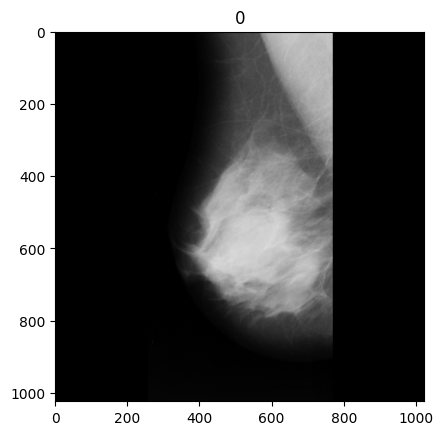

In [ ]:
plt.imshow(cv2.imread(img_name[0]))
plt.title(label[0])

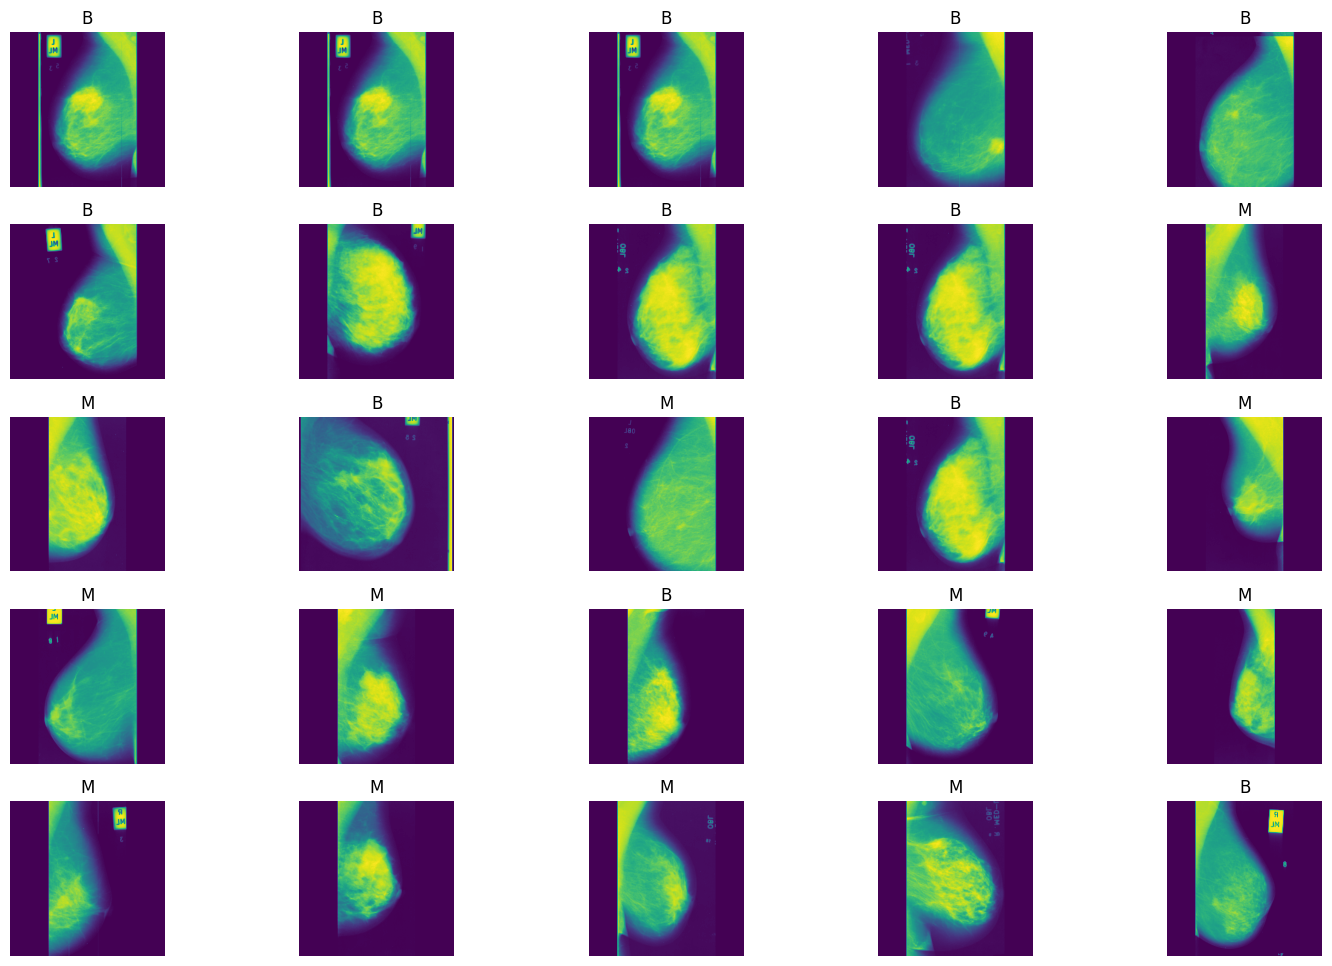

In [ ]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)

        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

view_25_random_image()

In [ ]:
img_path = []
last_label = []
for i in range(len(img_name)):

    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(0, 360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            last_label.append(label[i])

            #if label[i] == 1:
            #    last_label.append(1)
            #else:
            #    last_label.append(0)

In [ ]:
last_label = np.array(last_label)
last_label

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.25, random_state = 42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(32940, 10980, 32940, 10980)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
x_train.shape


(32940, 224, 224)

In [ ]:
x_test.shape


(10980, 224, 224)

In [ ]:
x_train = np.reshape(x_train, (32940,224, 224, 1)) # 1 for gray scale
x_test = np.reshape(x_test, (10980,224, 224,1))

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    #model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=25,
                 batch_size=64)

Epoch 1/25
412/412 [==============================] - 19s 31ms/step - loss: 0.6938 - accuracy: 0.5716 - val_loss: 0.6292 - val_accuracy: 0.6243
Epoch 2/25
412/412 [==============================] - 11s 26ms/step - loss: 0.5801 - accuracy: 0.6770 - val_loss: 0.5208 - val_accuracy: 0.7280
Epoch 3/25
412/412 [==============================] - 11s 26ms/step - loss: 0.4342 - accuracy: 0.7796 - val_loss: 0.4031 - val_accuracy: 0.8075
Epoch 4/25
412/412 [==============================] - 11s 26ms/step - loss: 0.3041 - accuracy: 0.8626 - val_loss: 0.2166 - val_accuracy: 0.9006
Epoch 5/25
412/412 [==============================] - 11s 26ms/step - loss: 0.2020 - accuracy: 0.9129 - val_loss: 0.2038 - val_accuracy: 0.9176
Epoch 6/25
412/412 [==============================] - 11s 26ms/step - loss: 0.1412 - accuracy: 0.9427 - val_loss: 0.0984 - val_accuracy: 0.9596
Epoch 7/25
412/412 [==============================] - 11s 26ms/step - loss: 0.1145 - accuracy: 0.9555 - val_loss: 0.1130 - val_accuracy:

In [ ]:
y_test = np.array(y_test)
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model.predict(x_test))

344/344 [==============================] - 2s 5ms/step - loss: 0.0326 - accuracy: 0.9870
Test_loss_value = 0.032597240060567856
test_accuracy = 0.9869763255119324
344/344 [==============================] - 2s 4ms/step
[[0.9999999 ]
 [0.99997735]
 [0.99999046]
 ...
 [0.9999902 ]
 [1.        ]
 [0.9999999 ]]


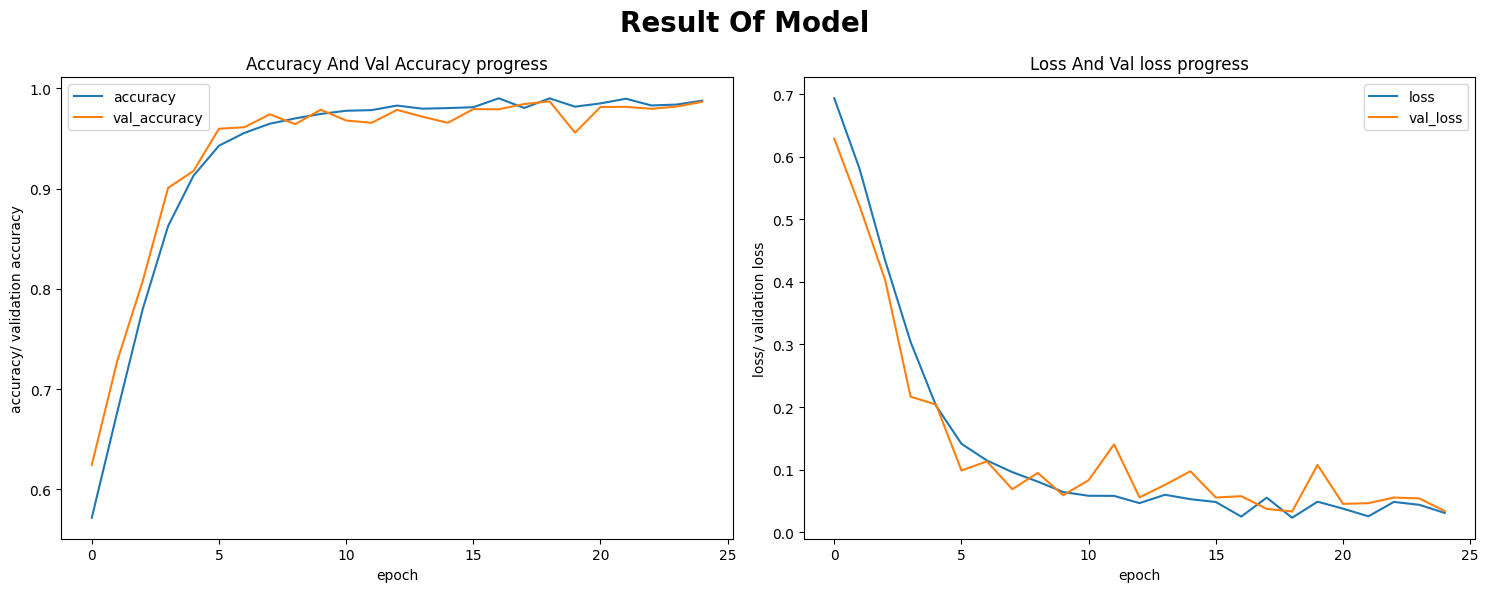

In [ ]:
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')

    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')

    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

In [ ]:
# En yüksek test ve eğitim doğruluk değerleri
max_train_accuracy = max(hist.history['accuracy'])
max_test_accuracy = max(hist.history['val_accuracy'])

# En düşük eğitim ve test loss değerleri
min_train_loss = min(hist.history['loss'])
min_test_loss = min(hist.history['val_loss'])

print("En yüksek eğitim doğruluğu:", max_train_accuracy)
print("En yüksek test doğruluğu:", max_test_accuracy)
print("En düşük eğitim kaybı (loss):", min_train_loss)
print("En düşük test kaybı (loss):", min_test_loss)


En yüksek eğitim doğruluğu: 0.9899817705154419
En yüksek test doğruluğu: 0.9869459867477417
En düşük eğitim kaybı (loss): 0.022870425134897232
En düşük test kaybı (loss): 0.03287508711218834


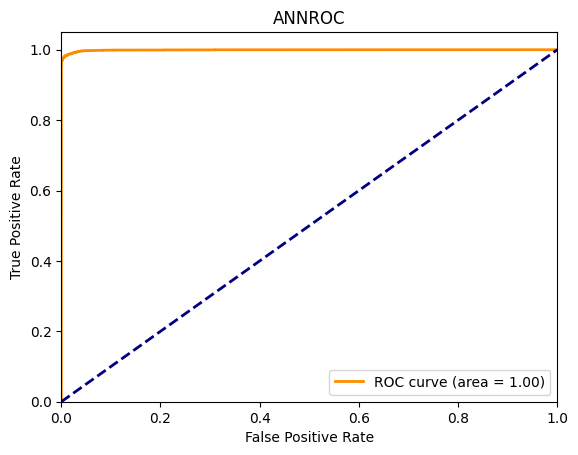

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#roc plot for specific class
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANNROC')
plt.legend(loc="lower right")
plt.show()